In [2]:
import os
import sys
sys.path.append(os.path.abspath('../'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import neural_lam.utils as utils
from neural_lam.constants import ERA5UKConstants

## Multi Resolution Results

In [70]:
run_path = "../wandb/offline-run-20240606_232655-9larn97f/files"
level_1_rmse_path = os.path.join(run_path, "level-1_test_rmse.csv")
level_1_rmse = np.loadtxt(level_1_rmse_path, delimiter=",").T
print(level_1_rmse.shape)

level_0_rmse_path = os.path.join(run_path, "level-0_test_rmse.csv")
level_0_rmse = np.loadtxt(level_0_rmse_path, delimiter=",").T
print(level_0_rmse.shape)

baseline_path = "../wandb/offline-run-20240607_000158-laoiz9ht/files/test_rmse.csv"
baseline_rmse = np.loadtxt(baseline_path, delimiter=',').T
print(baseline_rmse.shape)

(48, 28)
(48, 28)
(48, 28)


In [71]:
def rollout_axs(ax, var_name):
    var_idx = ERA5UKConstants.PARAM_NAMES.index(var_name)
    var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

    # ax.plot(level_0_rmse[var_idx], ".-", label=f"uk big")
    ax.plot(level_1_rmse[var_idx], ".-", label=f"uk local")
    ax.plot(baseline_rmse[var_idx], ".-", label=f"uk local - baseline")
    
    if var_name in ERA5UKConstants.CLIMATOLOGY:
        var_clim = ERA5UKConstants.CLIMATOLOGY[var_name]
        ax.axhline(var_clim, color="grey", linestyle="--", label="Climatology")

    xticks_pos = range(0, baseline_rmse.shape[1], 2)
    xticks_labels = [str((tick + 1) * 6) for tick in xticks_pos]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(xticks_labels)

    ax.legend()
    ax.set_xlabel("Lead Time (hours)")
    ax.set_ylabel(f"RMSE ({var_unit})")
    ax.set_title(f"Val RMSE: {var_name}")
    ax.grid(True)
    

z500
t850
q700
u850
v850
w850


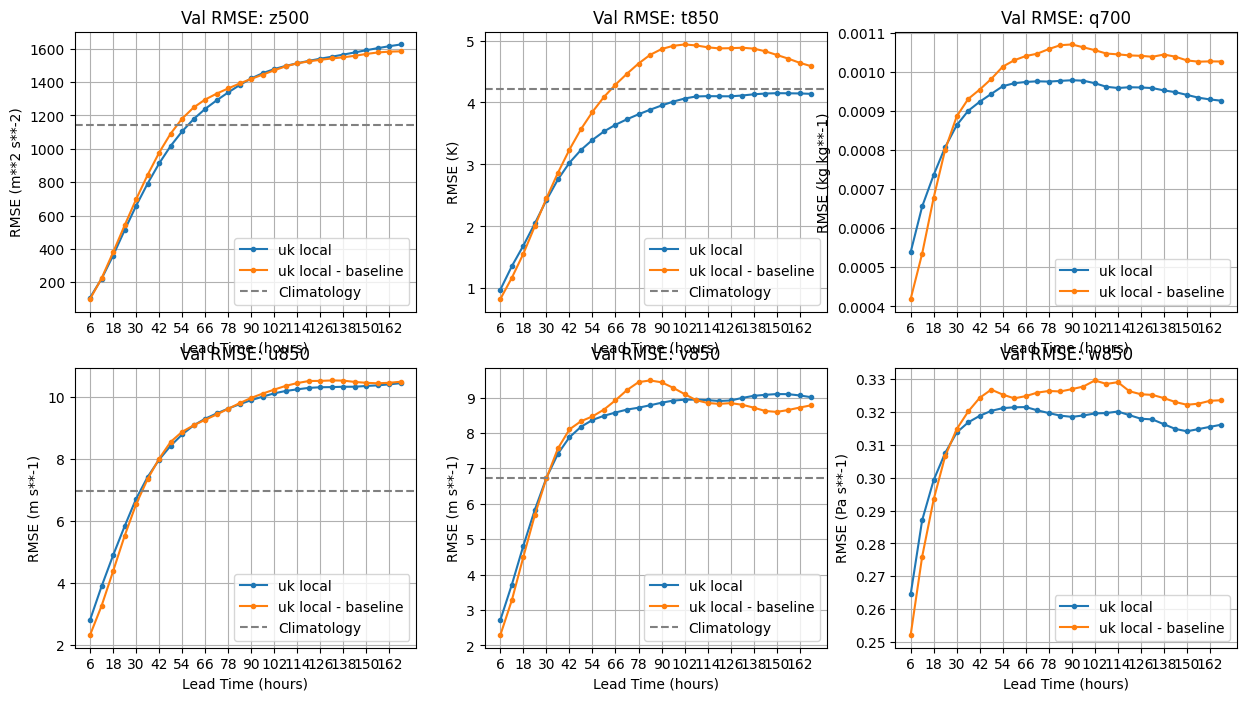

In [69]:
# headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]
headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]


fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for ax, var_name in zip(axs.flat, headline_vars):
    rollout_axs(ax, var_name)

## Plotting z on all levels

Text(0, 0.5, 'RMSE (m**2 s**-2)')

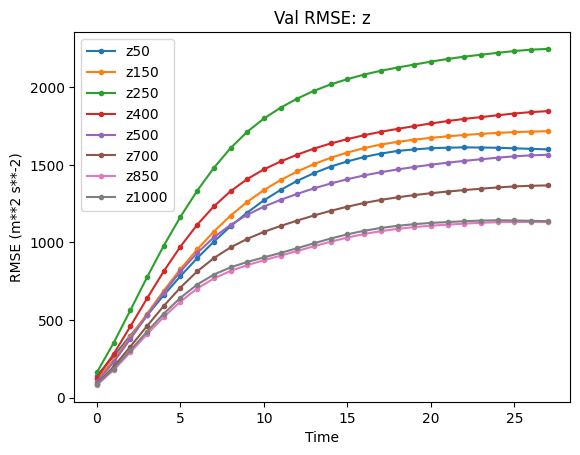

In [40]:
fig, ax = plt.subplots()
var_idx = 0
var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]

ax.set_title(f"Val RMSE: z")

for var_idx in range(8):
    var_name = ERA5UKConstants.PARAM_NAMES[var_idx]
    ax.plot(val_rmse[var_idx], ".-", label=var_name)
    
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel(f"RMSE ({var_unit})")